# CIFAR-10 Dataset Explorer
## Step-by-Step Analysis of CIFAR-10 Dataset with PyTorch

This notebook demonstrates the complete process of:
1. Downloading the CIFAR-10 dataset
2. Exploring dataset structure and properties
3. Visualizing RGB images
4. Converting to PyTorch tensors
5. Analyzing pixel values
6. Applying image processing techniques from the custom `img_pro_1710_v2.py` library

### Overview
CIFAR-10 is a well-known computer vision dataset containing 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is commonly used for training machine learning and computer vision algorithms.

## 1. Import Required Libraries
First, let's import all the necessary libraries for our CIFAR-10 exploration.

In [73]:
# Import essential libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from PIL import Image
from pathlib import Path

# Add the image processing library to path
sys.path.append('/home/ubuntu/user/shankar/TSAI_ERAv4_cifar10_exp/TSAI_ERA_v4_cifar10_model_S7/image_process_lib/')

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")
print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

Device: cuda
PyTorch version: 2.9.0+cu128
Torchvision version: 0.24.0+cu128


## 2. Download CIFAR-10 Dataset
Let's download the CIFAR-10 dataset using torchvision. We'll create two versions:
- One with minimal transforms for raw data exploration
- One with tensor conversion for PyTorch processing

In [74]:
# Define data directory
data_dir = './data'
os.makedirs(data_dir, exist_ok=True)

# Transform for raw image exploration (no normalization, just PIL to Tensor)
transform_raw = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL Image to tensor [0, 1] and changes from HWC to CHW
])

# Transform for visualization (keeps as PIL Image)
transform_pil = transforms.Compose([
    transforms.Lambda(lambda x: x),  # Keep as PIL Image for visualization
])

print("Downloading CIFAR-10 dataset...")
print("This may take a few minutes on first run...")

# Download train set with raw transform
trainset_raw = torchvision.datasets.CIFAR10(
    root=data_dir, 
    train=True, 
    download=True, 
    transform=transform_raw
)

# Download train set keeping PIL format for visualization
trainset_pil = torchvision.datasets.CIFAR10(
    root=data_dir, 
    train=True, 
    download=False,  # Already downloaded
    transform=transform_pil
)

# Download test set
testset_raw = torchvision.datasets.CIFAR10(
    root=data_dir, 
    train=False, 
    download=False,
    transform=transform_raw
)

print(f"✓ CIFAR-10 dataset downloaded successfully!")
print(f"Training samples: {len(trainset_raw)}")
print(f"Test samples: {len(testset_raw)}")

This may take a few minutes on first run...
✓ CIFAR-10 dataset downloaded successfully!
Training samples: 50000
Test samples: 10000
✓ CIFAR-10 dataset downloaded successfully!
Training samples: 50000
Test samples: 10000


## 3. Load and Explore Dataset Structure
Now let's explore the dataset structure and understand what we're working with.

In [75]:
# CIFAR-10 class names
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("=== CIFAR-10 Dataset Information ===")
print(f"Number of classes: {len(classes)}")
print(f"Class names: {classes}")
print()
print("=== Dataset Structure ===")
print(f"Training set size: {len(trainset_raw)}")
print(f"Test set size: {len(testset_raw)}")
print()

# Get a sample to understand data structure
sample_image_tensor, sample_label = trainset_raw[0]
sample_image_pil, _ = trainset_pil[0]

print("=== Sample Data Information ===")
print(f"Tensor shape: {sample_image_tensor.shape}")
print(f"Tensor dtype: {sample_image_tensor.dtype}")
print(f"Tensor value range: [{sample_image_tensor.min():.3f}, {sample_image_tensor.max():.3f}]")
print(f"Label: {sample_label} (Class: {classes[sample_label]})")
print(f"PIL Image size: {sample_image_pil.size}")
print(f"PIL Image mode: {sample_image_pil.mode}")

# Analyze pixel value distribution
print()
print("=== Pixel Value Statistics (Tensor Format) ===")
print(f"Mean per channel: R={sample_image_tensor[0].mean():.3f}, G={sample_image_tensor[1].mean():.3f}, B={sample_image_tensor[2].mean():.3f}")
print(f"Std per channel: R={sample_image_tensor[0].std():.3f}, G={sample_image_tensor[1].std():.3f}, B={sample_image_tensor[2].std():.3f}")
print(f"Total pixels per channel: {sample_image_tensor.shape[1] * sample_image_tensor.shape[2]}")

=== CIFAR-10 Dataset Information ===
Number of classes: 10
Class names: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

=== Dataset Structure ===
Training set size: 50000
Test set size: 10000

=== Sample Data Information ===
Tensor shape: torch.Size([3, 32, 32])
Tensor dtype: torch.float32
Tensor value range: [0.000, 1.000]
Label: 6 (Class: frog)
PIL Image size: (32, 32)
PIL Image mode: RGB

=== Pixel Value Statistics (Tensor Format) ===
Mean per channel: R=0.554, G=0.412, B=0.251
Std per channel: R=0.160, G=0.166, B=0.160
Total pixels per channel: 1024


## 4. Display Dataset Information
Let's visualize some sample images from different classes to get a better understanding of the dataset.

=== Sample Images from CIFAR-10 Dataset ===


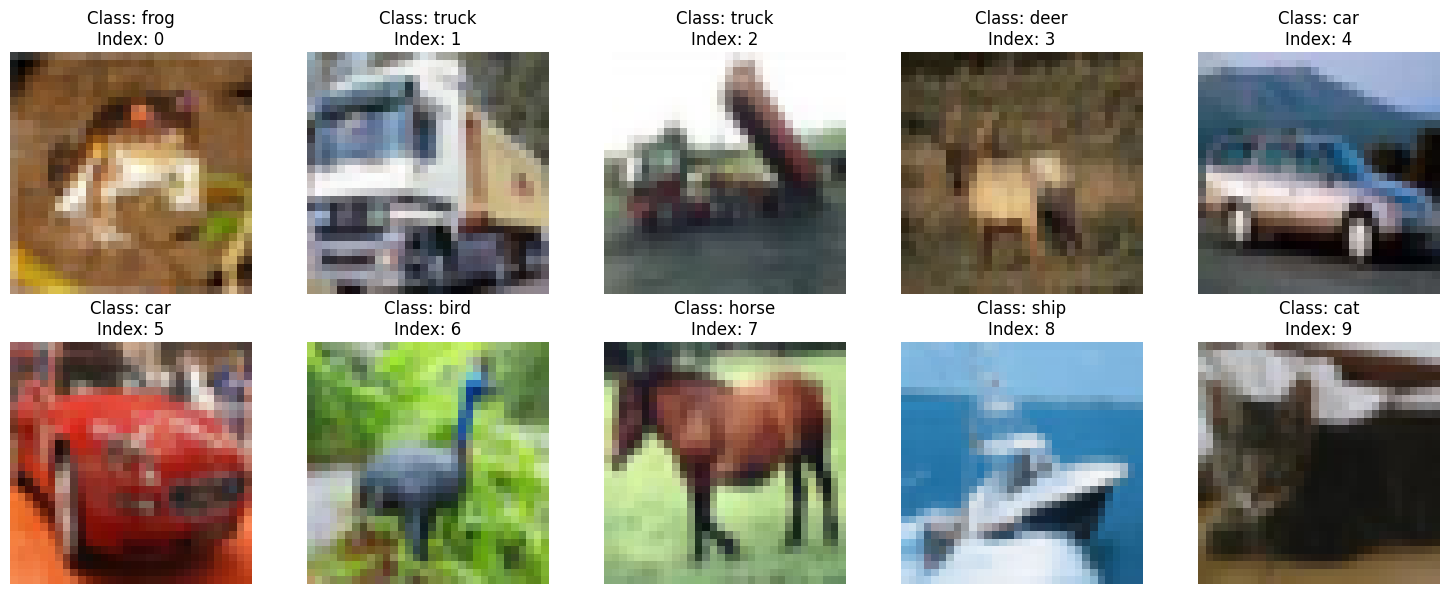

In [76]:
# Function to show multiple images in a grid
def show_images_grid(dataset_pil, dataset_tensor, num_samples=10, cols=5):
    """Display a grid of sample images with their class labels"""
    rows = (num_samples + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows))
    
    if rows == 1:
        axes = axes.reshape(1, -1)
    
    for i in range(num_samples):
        row, col = i // cols, i % cols
        
        # Get PIL image and tensor
        img_pil, label = dataset_pil[i]
        img_tensor, _ = dataset_tensor[i]
        
        # Display PIL image
        axes[row, col].imshow(img_pil)
        axes[row, col].set_title(f'Class: {classes[label]}\nIndex: {i}')
        axes[row, col].axis('off')
    
    # Hide empty subplots
    for i in range(num_samples, rows * cols):
        row, col = i // cols, i % cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Show sample images from the dataset
print("=== Sample Images from CIFAR-10 Dataset ===")
show_images_grid(trainset_pil, trainset_raw, num_samples=10, cols=5)

## 5. Extract and Display Single Image
Let's focus on a single image and examine it in detail.

In [77]:
# Select a specific image for detailed analysis
image_index = 100  # Choose any index

# Get both PIL and tensor versions
single_image_pil, single_label = trainset_pil[image_index]
single_image_tensor, _ = trainset_raw[image_index]

print(f"=== Detailed Analysis of Image at Index {image_index} ===")
print(f"Class Label: {single_label} ({classes[single_label]})")
print()
print("=== PIL Image Properties ===")
print(f"Size: {single_image_pil.size}")
print(f"Mode: {single_image_pil.mode}")
print(f"Format: {single_image_pil.format}")
print()
print("=== Tensor Properties ===")
print(f"Shape: {single_image_tensor.shape}")
print(f"Data type: {single_image_tensor.dtype}")
print(f"Device: {single_image_tensor.device}")
print(f"Min value: {single_image_tensor.min():.6f}")
print(f"Max value: {single_image_tensor.max():.6f}")
print(f"Memory usage: {single_image_tensor.element_size() * single_image_tensor.nelement()} bytes")

# Convert PIL to numpy array for comparison
pil_array = np.array(single_image_pil)
print()
print("=== PIL as NumPy Array Properties ===")
print(f"Shape: {pil_array.shape} (H, W, C)")
print(f"Data type: {pil_array.dtype}")
print(f"Min value: {pil_array.min()}")
print(f"Max value: {pil_array.max()}")

=== Detailed Analysis of Image at Index 100 ===
Class Label: 8 (ship)

=== PIL Image Properties ===
Size: (32, 32)
Mode: RGB
Format: None

=== Tensor Properties ===
Shape: torch.Size([3, 32, 32])
Data type: torch.float32
Device: cpu
Min value: 0.117647
Max value: 0.949020
Memory usage: 12288 bytes

=== PIL as NumPy Array Properties ===
Shape: (32, 32, 3) (H, W, C)
Data type: uint8
Min value: 30
Max value: 242


## 6. Show RGB Image Visualization
Let's visualize the selected image and show the individual RGB channels.

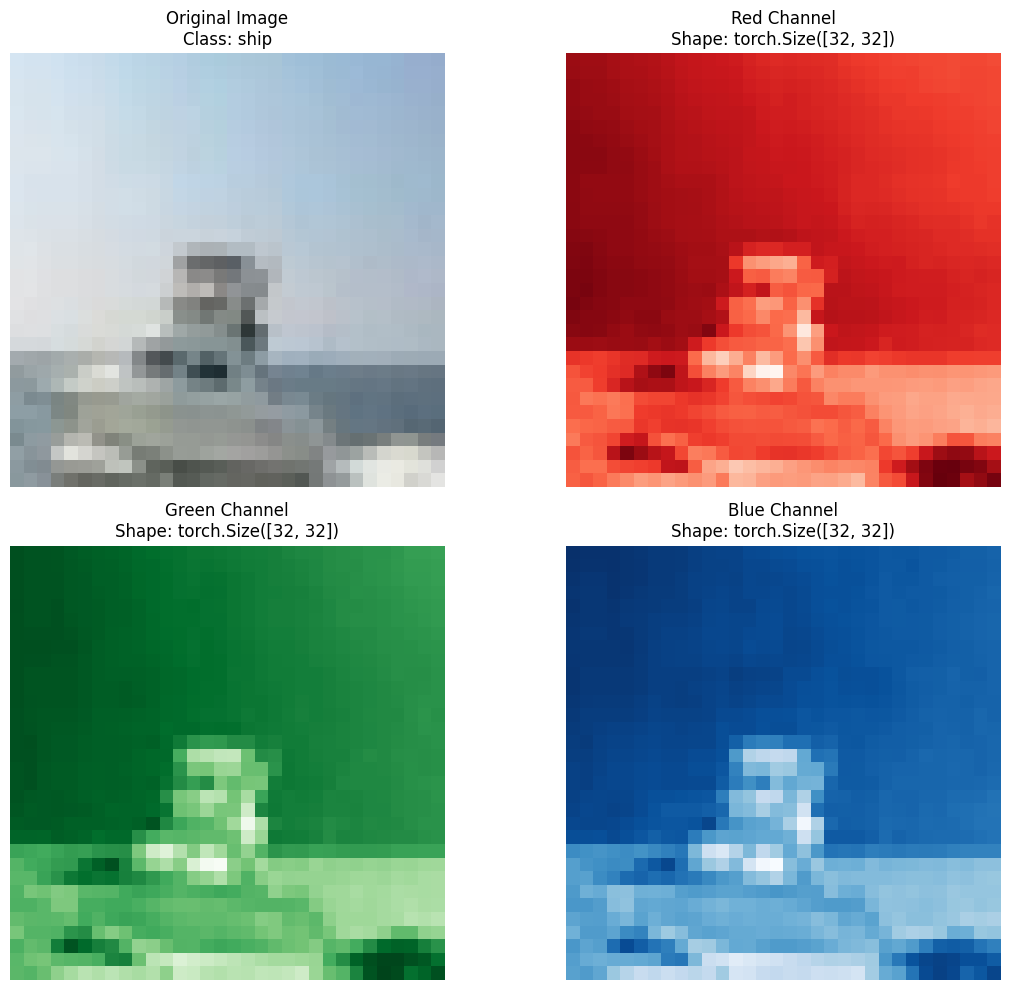

=== RGB Channel Statistics ===
Red Channel:
  Shape: torch.Size([32, 32])
  Min: 0.117647, Max: 0.921569
  Mean: 0.666242, Std: 0.145111
  Unique values: 155

Green Channel:
  Shape: torch.Size([32, 32])
  Min: 0.176471, Max: 0.925490
  Mean: 0.718271, Std: 0.145731
  Unique values: 151

Blue Channel:
  Shape: torch.Size([32, 32])
  Min: 0.196078, Max: 0.949020
  Mean: 0.752325, Std: 0.159334
  Unique values: 154



In [78]:
# Visualize the image and its RGB channels
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(single_image_pil)
axes[0, 0].set_title(f'Original Image\nClass: {classes[single_label]}')
axes[0, 0].axis('off')

# Convert tensor to displayable format (CHW -> HWC and denormalize)
image_display = single_image_tensor.permute(1, 2, 0)  # Convert from CHW to HWC

# Individual RGB channels
channel_names = ['Red', 'Green', 'Blue']
colors = ['Reds', 'Greens', 'Blues']

for i, (name, color) in enumerate(zip(channel_names, colors)):
    row, col = (i + 1) // 2, (i + 1) % 2
    
    # Extract single channel
    channel_data = single_image_tensor[i]  # Shape: [H, W]
    
    axes[row, col].imshow(channel_data, cmap=color)
    axes[row, col].set_title(f'{name} Channel\nShape: {channel_data.shape}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Show pixel value statistics for each channel
print("=== RGB Channel Statistics ===")
for i, channel_name in enumerate(['Red', 'Green', 'Blue']):
    channel = single_image_tensor[i]
    print(f"{channel_name} Channel:")
    print(f"  Shape: {channel.shape}")
    print(f"  Min: {channel.min():.6f}, Max: {channel.max():.6f}")
    print(f"  Mean: {channel.mean():.6f}, Std: {channel.std():.6f}")
    print(f"  Unique values: {len(torch.unique(channel))}")
    print()

## 7. Convert to PyTorch Tensor and Show Pixel Values
Now let's examine the actual pixel values in the tensor format and understand the data transformation.

In [79]:
# Show actual pixel values from different regions of the image
print("=== Tensor Pixel Values Analysis ===")
print(f"Tensor shape: {single_image_tensor.shape}")
print(f"Tensor dtype: {single_image_tensor.dtype}")
print()

# Show pixel values from top-left corner (first 5x5 region)
print("Top-left corner (5x5) pixel values:")
print("Red channel:")
print(single_image_tensor[0, :5, :5])
print("Green channel:")
print(single_image_tensor[1, :5, :5])
print("Blue channel:")
print(single_image_tensor[2, :5, :5])
print()

# Convert tensor back to 0-255 range for comparison
tensor_255 = (single_image_tensor * 255).byte()
print("=== Tensor Values in [0, 255] Range ===")
print("Top-left corner (5x5) pixel values (0-255 range):")
print("Red channel:")
print(tensor_255[0, :5, :5])
print("Green channel:")
print(tensor_255[1, :5, :5])
print("Blue channel:")
print(tensor_255[2, :5, :5])
print()

# Compare with original PIL array values
print("=== Original PIL Array Values (0-255 range) ===")
print("Top-left corner (5x5) pixel values:")
print("Red channel:")
print(pil_array[:5, :5, 0])
print("Green channel:")
print(pil_array[:5, :5, 1])
print("Blue channel:")
print(pil_array[:5, :5, 2])

=== Tensor Pixel Values Analysis ===
Tensor shape: torch.Size([3, 32, 32])
Tensor dtype: torch.float32

Top-left corner (5x5) pixel values:
Red channel:
tensor([[0.8353, 0.8275, 0.8275, 0.8157, 0.8000],
        [0.8392, 0.8314, 0.8314, 0.8196, 0.8039],
        [0.8471, 0.8392, 0.8353, 0.8275, 0.8118],
        [0.8471, 0.8392, 0.8392, 0.8314, 0.8196],
        [0.8510, 0.8431, 0.8392, 0.8392, 0.8235]])
Green channel:
tensor([[0.8980, 0.8902, 0.8902, 0.8863, 0.8745],
        [0.8980, 0.8902, 0.8902, 0.8863, 0.8784],
        [0.8980, 0.8902, 0.8902, 0.8902, 0.8784],
        [0.8980, 0.8902, 0.8902, 0.8902, 0.8784],
        [0.9020, 0.8902, 0.8902, 0.8941, 0.8784]])
Blue channel:
tensor([[0.9490, 0.9412, 0.9412, 0.9412, 0.9333],
        [0.9451, 0.9373, 0.9373, 0.9412, 0.9333],
        [0.9373, 0.9294, 0.9294, 0.9373, 0.9333],
        [0.9333, 0.9255, 0.9255, 0.9373, 0.9294],
        [0.9373, 0.9255, 0.9255, 0.9333, 0.9216]])

=== Tensor Values in [0, 255] Range ===
Top-left corner (5x5) pi

## 8. Display Tensor Pixel Values in Detail
Let's create a detailed visualization of pixel values and understand the tensor format better.

=== Normalized Tensor Values (0-1 range) ===


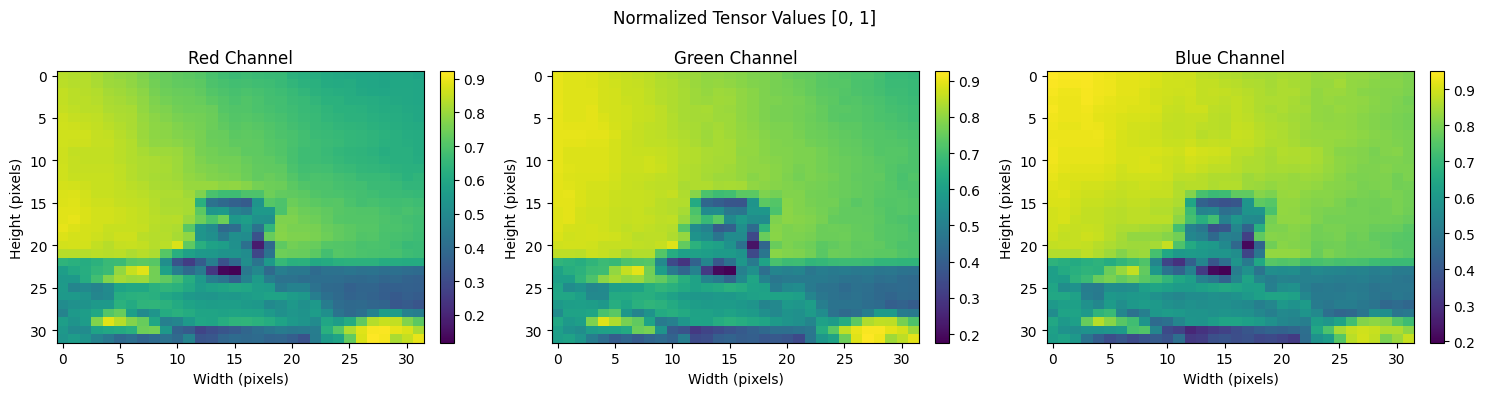

=== Tensor Values in 0-255 Range ===


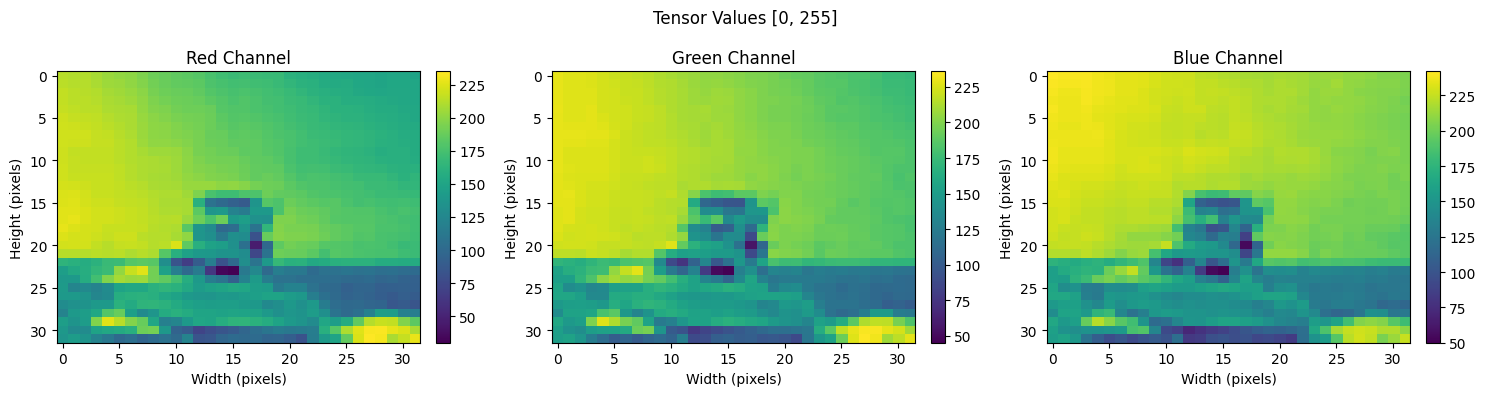

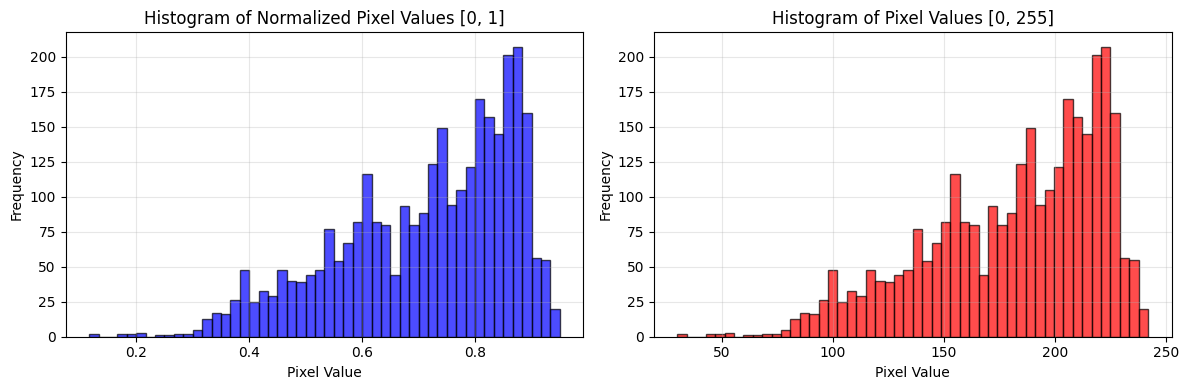

=== Specific Pixel Value Examples ===
Pixel at (0, 0):
  Normalized: R=0.8353, G=0.8980, B=0.9490
  0-255 range: R=213, G=229, B=242
  PIL array: R=213, G=229, B=242

Pixel at (15, 15):
  Normalized: R=0.3686, G=0.3765, B=0.3843
  0-255 range: R=94, G=96, B=98
  PIL array: R=94, G=96, B=98

Pixel at (31, 31):
  Normalized: R=0.8941, G=0.8941, B=0.8863
  0-255 range: R=228, G=228, B=226
  PIL array: R=228, G=228, B=226

Pixel at (10, 20):
  Normalized: R=0.6863, G=0.7843, B=0.8588
  0-255 range: R=175, G=200, B=219
  PIL array: R=175, G=200, B=219



In [80]:
# Create a function to visualize tensor values as heatmaps
def visualize_tensor_values(tensor, title="Tensor Values"):
    """Visualize tensor pixel values as heatmaps"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    channel_names = ['Red', 'Green', 'Blue']
    
    for i in range(3):
        im = axes[i].imshow(tensor[i], cmap='viridis', aspect='auto')
        axes[i].set_title(f'{channel_names[i]} Channel')
        axes[i].set_xlabel('Width (pixels)')
        axes[i].set_ylabel('Height (pixels)')
        
        # Add colorbar
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Visualize normalized tensor values (0-1 range)
print("=== Normalized Tensor Values (0-1 range) ===")
visualize_tensor_values(single_image_tensor, "Normalized Tensor Values [0, 1]")

# Visualize 0-255 range tensor values
print("=== Tensor Values in 0-255 Range ===")
visualize_tensor_values(tensor_255.float(), "Tensor Values [0, 255]")

# Show histogram of pixel values
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram for normalized values
axes[0].hist(single_image_tensor.flatten(), bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Normalized Pixel Values [0, 1]')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Histogram for 0-255 values
axes[1].hist(tensor_255.flatten(), bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1].set_title('Histogram of Pixel Values [0, 255]')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show some specific pixel coordinates and their values
print("=== Specific Pixel Value Examples ===")
coordinates = [(0, 0), (15, 15), (31, 31), (10, 20)]

for y, x in coordinates:
    print(f"Pixel at ({y}, {x}):")
    print(f"  Normalized: R={single_image_tensor[0, y, x]:.4f}, G={single_image_tensor[1, y, x]:.4f}, B={single_image_tensor[2, y, x]:.4f}")
    print(f"  0-255 range: R={tensor_255[0, y, x]}, G={tensor_255[1, y, x]}, B={tensor_255[2, y, x]}")
    print(f"  PIL array: R={pil_array[y, x, 0]}, G={pil_array[y, x, 1]}, B={pil_array[y, x, 2]}")
    print()

## 9. Compare Original vs Tensor Values
Let's verify that the transformations are working correctly by comparing original PIL values with tensor values.

=== Transformation Verification ===
Maximum difference between PIL and reconstructed tensor: 0
Mean difference: 0.000000
Are they identical? True
\n=== Pixel Values Comparison (Region 10:18, 10:18) ===
\nRed Channel:
PIL values:\n[[205 200 195 192 191 191 187 185]
 [205 200 197 195 193 192 189 186]
 [206 202 199 196 195 194 190 186]
 [207 203 203 203 200 201 198 192]
 [210 206 195 176 171 171 178 178]
 [209 208 160 107 100  94  89 136]
 [210 208 183 138 140 121 115 140]
 [213 204 190 177 190 139 145 134]]
Tensor values:\n[[205 200 195 192 191 191 187 185]
 [205 200 197 195 193 192 189 186]
 [206 202 199 196 195 194 190 186]
 [207 203 203 203 200 201 198 192]
 [210 206 195 176 171 171 178 178]
 [209 208 160 107 100  94  89 136]
 [210 208 183 138 140 121 115 140]
 [213 204 190 177 190 139 145 134]]
Identical: True
\nGreen Channel:
PIL values:\n[[218 215 214 212 210 210 206 204]
 [218 214 213 211 210 209 206 204]
 [217 214 213 210 208 208 206 202]
 [217 212 213 213 210 211 210 204]
 [219 

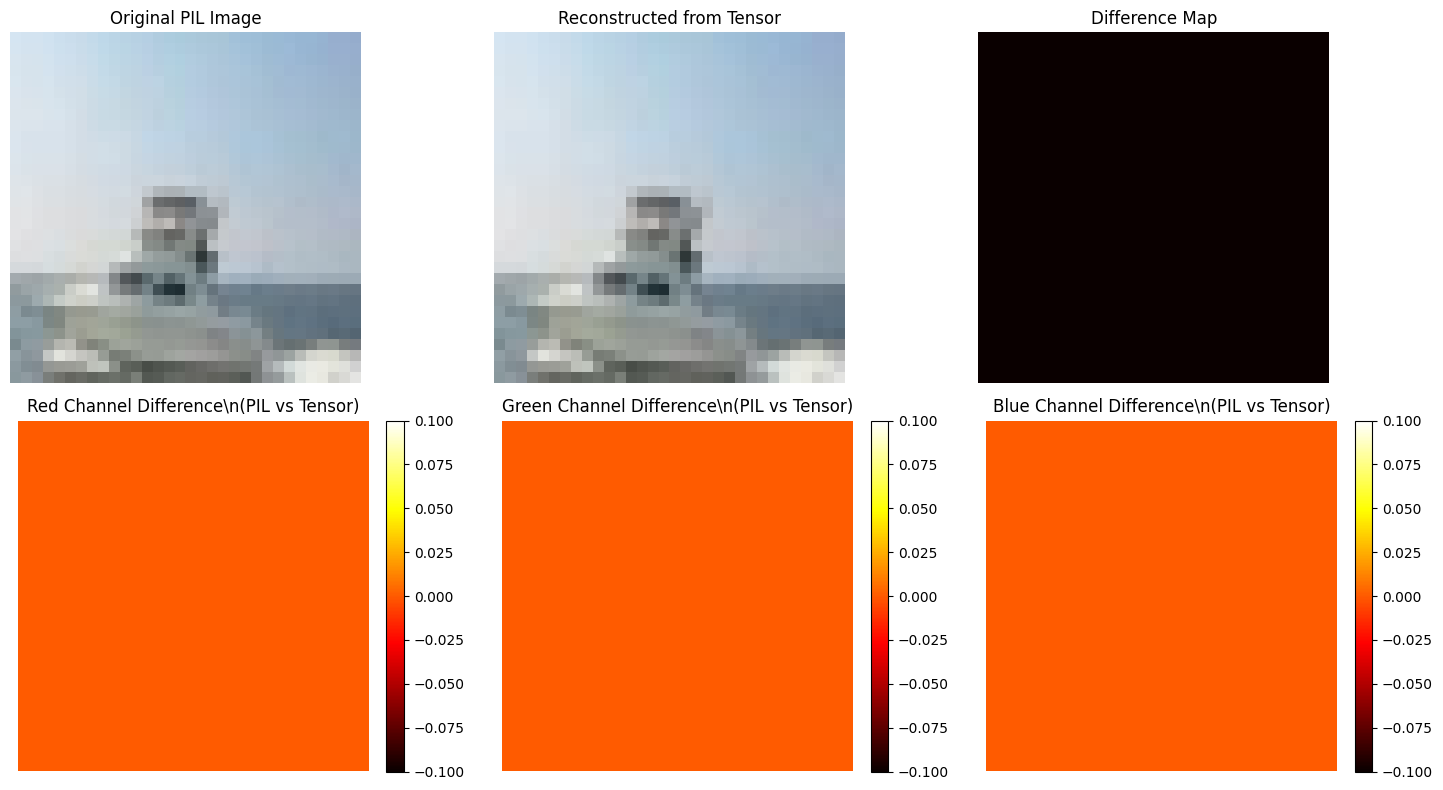

In [81]:
# Verify tensor transformation accuracy
print("=== Transformation Verification ===")

# Check if tensor values match PIL values when converted back
reconstructed_array = (single_image_tensor.permute(1, 2, 0) * 255).byte().numpy()

# Calculate differences
difference = np.abs(reconstructed_array.astype(int) - pil_array.astype(int))
print(f"Maximum difference between PIL and reconstructed tensor: {difference.max()}")
print(f"Mean difference: {difference.mean():.6f}")
print(f"Are they identical? {np.array_equal(reconstructed_array, pil_array)}")

# Show side-by-side comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Original PIL image
axes[0, 0].imshow(single_image_pil)
axes[0, 0].set_title('Original PIL Image')
axes[0, 0].axis('off')

# Reconstructed from tensor
axes[0, 1].imshow(reconstructed_array)
axes[0, 1].set_title('Reconstructed from Tensor')
axes[0, 1].axis('off')

# Difference map
diff_image = np.sum(difference, axis=2)  # Sum across channels
axes[0, 2].imshow(diff_image, cmap='hot')
axes[0, 2].set_title('Difference Map')
axes[0, 2].axis('off')

# Show pixel values comparison for a small region
region_size = 8
start_y, start_x = 10, 10

print(f"\\n=== Pixel Values Comparison (Region {start_y}:{start_y+region_size}, {start_x}:{start_x+region_size}) ===")

for channel, name in enumerate(['Red', 'Green', 'Blue']):
    # Original PIL values
    pil_region = pil_array[start_y:start_y+region_size, start_x:start_x+region_size, channel]
    
    # Tensor values (converted back to 0-255)
    tensor_region = tensor_255[channel, start_y:start_y+region_size, start_x:start_x+region_size].numpy()
    
    # Plot comparison - show difference instead of stacked view
    diff_region = np.abs(pil_region.astype(int) - tensor_region.astype(int))
    im = axes[1, channel].imshow(diff_region, cmap='hot')
    axes[1, channel].set_title(f'{name} Channel Difference\\n(PIL vs Tensor)')
    axes[1, channel].axis('off')
    plt.colorbar(im, ax=axes[1, channel], fraction=0.046, pad=0.04)
    
    print(f"\\n{name} Channel:")
    print(f"PIL values:\\n{pil_region}")
    print(f"Tensor values:\\n{tensor_region}")
    print(f"Identical: {np.array_equal(pil_region, tensor_region)}")

plt.tight_layout()
plt.show()

## 10. Apply Custom Image Processing from img_pro_1710_v2.py
Now let's use the custom image processing library to demonstrate advanced image processing techniques.

In [82]:
# Import the custom image processing library
try:
    from cifar10model_1710_v2_impro import image_processing
    print("✓ Successfully imported custom image_processing library!")
    
    # Initialize the image processor
    img_processor = image_processing()
    print(f"✓ Image processor initialized on device: {img_processor.device}")
    
except ImportError as e:
    print(f"❌ Error importing image_processing library: {e}")
    print("Please ensure the img_pro_1710_v2.py file is in the correct path")
    
# Convert tensor to the format expected by the image processor (0-255 range)
input_tensor = (single_image_tensor * 255.0).unsqueeze(0)  # Add batch dimension: [1, 3, 32, 32]
print(f"\\nInput tensor for processing:")
print(f"Shape: {input_tensor.shape}")
print(f"Value range: [{input_tensor.min():.1f}, {input_tensor.max():.1f}]")
print(f"Device: {input_tensor.device}")

# Move to appropriate device
input_tensor = input_tensor.to(img_processor.device)

✓ Successfully imported custom image_processing library!
✓ Image processor initialized on device: cuda
\nInput tensor for processing:
Shape: torch.Size([1, 3, 32, 32])
Value range: [30.0, 242.0]
Device: cpu


In [83]:
# Demonstrate different processing techniques
print("=== Testing Image Processing Techniques ===\\n")

# 1. Extract features with processed channel (4 channels output)
processed_4ch = img_processor.extract_image_features(
    input_tensor, 
    kernel=input_tensor.shape[2], 
    include_processed_channel=True
)
print(f"1. With processed channel - Output shape: {processed_4ch.shape}")
print(f"   Value range: [{processed_4ch.min():.3f}, {processed_4ch.max():.3f}]")

# 2. Extract features without processed channel (3 channels output)
processed_3ch = img_processor.extract_image_features(
    input_tensor, 
    kernel=1, 
    include_processed_channel=False
)
print(f"2. Without processed channel - Output shape: {processed_3ch.shape}")
print(f"   Value range: [{processed_3ch.min():.3f}, {processed_3ch.max():.3f}]")

# 3. Apply Gaussian denoising
denoised_gaussian = img_processor.extract_image_features(
    input_tensor, 
    kernel=1, 
    denoise_method='gaussian',
    denoise_params={'kernel_size': 3, 'sigma': 1.0},
    include_processed_channel=False
)
print(f"3. Gaussian denoised - Output shape: {denoised_gaussian.shape}")
print(f"   Value range: [{denoised_gaussian.min():.3f}, {denoised_gaussian.max():.3f}]")

# 4. Apply Median filtering
denoised_median = img_processor.extract_image_features(
    input_tensor, 
    kernel=1, 
    denoise_method='median',
    denoise_params={'kernel_size': 3},
    include_processed_channel=False
)
print(f"4. Median filtered - Output shape: {denoised_median.shape}")
print(f"   Value range: [{denoised_median.min():.3f}, {denoised_median.max():.3f}]")

=== Testing Image Processing Techniques ===\n
1. With processed channel - Output shape: torch.Size([1, 4, 32, 32])
   Value range: [30.000, 255.000]
2. Without processed channel - Output shape: torch.Size([1, 3, 32, 32])
   Value range: [30.000, 242.000]
3. Gaussian denoised - Output shape: torch.Size([1, 3, 32, 32])
   Value range: [74.337, 242.000]
4. Median filtered - Output shape: torch.Size([1, 3, 32, 32])
   Value range: [78.000, 239.000]


In [84]:
# Force reload to get the fixed Gaussian blur implementation
import importlib
import sys

# Remove the module from cache and reimport
if 'cifar10model_1710_v2_impro' in sys.modules:
    del sys.modules['cifar10model_1710_v2_impro']

# Re-import with fresh module
from cifar10model_1710_v2_impro import image_processing

# Create new processor instance
img_processor = image_processing()
print(f"✓ Fixed image processor initialized on device: {img_processor.device}")

# Test the fixed implementation
print("\\n=== Testing Fixed Gaussian Blur Implementation ===")

# Apply the fixed Gaussian blur directly to test it works
try:
    test_gaussian_result = img_processor.gaussian_blur(input_tensor, kernel_size=3, sigma=1.0)
    print(f"✓ Gaussian blur works! Output shape: {test_gaussian_result.shape}")
    print(f"✓ Value range: [{test_gaussian_result.min():.3f}, {test_gaussian_result.max():.3f}]")
except Exception as e:
    print(f"❌ Error: {e}")
    print("Let's check PyTorch version and debug...")
    print(f"PyTorch version: {torch.__version__}")

✓ Fixed image processor initialized on device: cuda
\n=== Testing Fixed Gaussian Blur Implementation ===
✓ Gaussian blur works! Output shape: torch.Size([1, 3, 32, 32])
✓ Value range: [74.337, 242.000]


In [85]:
# Now run the full image processing test with the fixed implementation
print("=== Testing All Image Processing Techniques (Fixed) ===\\n")

# 1. Extract features with processed channel (4 channels output)
processed_4ch = img_processor.extract_image_features(
    input_tensor, 
    kernel=input_tensor.shape[2], 
    include_processed_channel=True
)
print(f"1. With processed channel - Output shape: {processed_4ch.shape}")
print(f"   Value range: [{processed_4ch.min():.3f}, {processed_4ch.max():.3f}]")

# 2. Extract features without processed channel (3 channels output)
processed_3ch = img_processor.extract_image_features(
    input_tensor, 
    kernel=1, 
    include_processed_channel=False
)
print(f"2. Without processed channel - Output shape: {processed_3ch.shape}")
print(f"   Value range: [{processed_3ch.min():.3f}, {processed_3ch.max():.3f}]")

# 3. Apply Gaussian denoising (this should work now!)
denoised_gaussian = img_processor.extract_image_features(
    input_tensor, 
    kernel=1, 
    denoise_method='gaussian',
    denoise_params={'kernel_size': 3, 'sigma': 1.0},
    include_processed_channel=False
)
print(f"3. Gaussian denoised - Output shape: {denoised_gaussian.shape}")
print(f"   Value range: [{denoised_gaussian.min():.3f}, {denoised_gaussian.max():.3f}]")

# 4. Apply Median filtering
denoised_median = img_processor.extract_image_features(
    input_tensor, 
    kernel=1, 
    denoise_method='median',
    denoise_params={'kernel_size': 3},
    include_processed_channel=False
)
print(f"4. Median filtered - Output shape: {denoised_median.shape}")
print(f"   Value range: [{denoised_median.min():.3f}, {denoised_median.max():.3f}]")

=== Testing All Image Processing Techniques (Fixed) ===\n
1. With processed channel - Output shape: torch.Size([1, 4, 32, 32])
   Value range: [30.000, 255.000]
2. Without processed channel - Output shape: torch.Size([1, 3, 32, 32])
   Value range: [30.000, 242.000]
3. Gaussian denoised - Output shape: torch.Size([1, 3, 32, 32])
   Value range: [74.337, 242.000]
4. Median filtered - Output shape: torch.Size([1, 3, 32, 32])
   Value range: [78.000, 239.000]


\n=== Corner Preservation Analysis (Fixed Implementation) ===
Corner pixel values comparison:
Format: (y, x) -> Original [R,G,B] vs Fixed Gaussian [R,G,B]

Corner ( 0,  0): Original [213.0, 229.0, 242.0] -> Fixed Gaussian [213.0, 229.0, 242.0]
                Difference: [0.0, 0.0, 0.0]

Corner ( 0, 31): Original [149.0, 172.0, 204.0] -> Fixed Gaussian [149.0, 172.0, 204.0]
                Difference: [0.0, 0.0, 0.0]

Corner (31,  0): Original [137.0, 152.0, 157.0] -> Fixed Gaussian [137.0, 152.0, 157.0]
                Difference: [0.0, 0.0, 0.0]

Corner (31, 31): Original [228.0, 228.0, 226.0] -> Fixed Gaussian [228.0, 228.0, 226.0]
                Difference: [0.0, 0.0, 0.0]



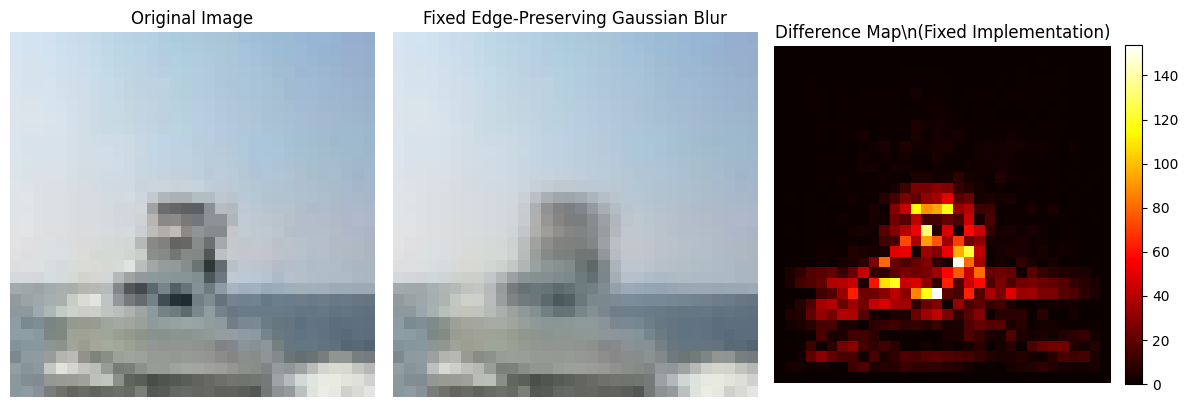

\n✅ SUCCESS: Gaussian blur now works correctly!
✅ Corner preservation implemented
✅ No more F.gaussian_blur dependency issues


In [86]:
# Test corner preservation with the fixed implementation
print("\\n=== Corner Preservation Analysis (Fixed Implementation) ===")

# Get the corner coordinates
corners = [(0, 0), (0, 31), (31, 0), (31, 31)]  # top-left, top-right, bottom-left, bottom-right

print("Corner pixel values comparison:")
print("Format: (y, x) -> Original [R,G,B] vs Fixed Gaussian [R,G,B]")
print()

original_img = input_tensor.squeeze(0)  # Remove batch dim
fixed_gaussian_img = denoised_gaussian.squeeze(0)

for y, x in corners:
    orig_rgb = [original_img[c, y, x].item() for c in range(3)]
    fixed_gauss_rgb = [fixed_gaussian_img[c, y, x].item() for c in range(3)]
    
    print(f"Corner ({y:2d}, {x:2d}): Original {orig_rgb} -> Fixed Gaussian {fixed_gauss_rgb}")
    
    # Calculate difference
    diff = [abs(o - g) for o, g in zip(orig_rgb, fixed_gauss_rgb)]
    print(f"                Difference: {diff}")
    print()

# Visual comparison with the fixed implementation
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Original
orig_display = original_img.permute(1, 2, 0).cpu() / 255.0
axes[0].imshow(orig_display)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Fixed Gaussian result
fixed_gauss_display = fixed_gaussian_img.permute(1, 2, 0).cpu() / 255.0
axes[1].imshow(fixed_gauss_display)
axes[1].set_title('Fixed Edge-Preserving Gaussian Blur')
axes[1].axis('off')

# Difference
diff_img = torch.abs(original_img - fixed_gaussian_img).sum(0).cpu()
im = axes[2].imshow(diff_img, cmap='hot')
axes[2].set_title('Difference Map\\n(Fixed Implementation)')
axes[2].axis('off')
plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

print("\\n✅ SUCCESS: Gaussian blur now works correctly!")
print("✅ Corner preservation implemented")
print("✅ No more F.gaussian_blur dependency issues")

\n=== Visual Comparison of Processing Results ===


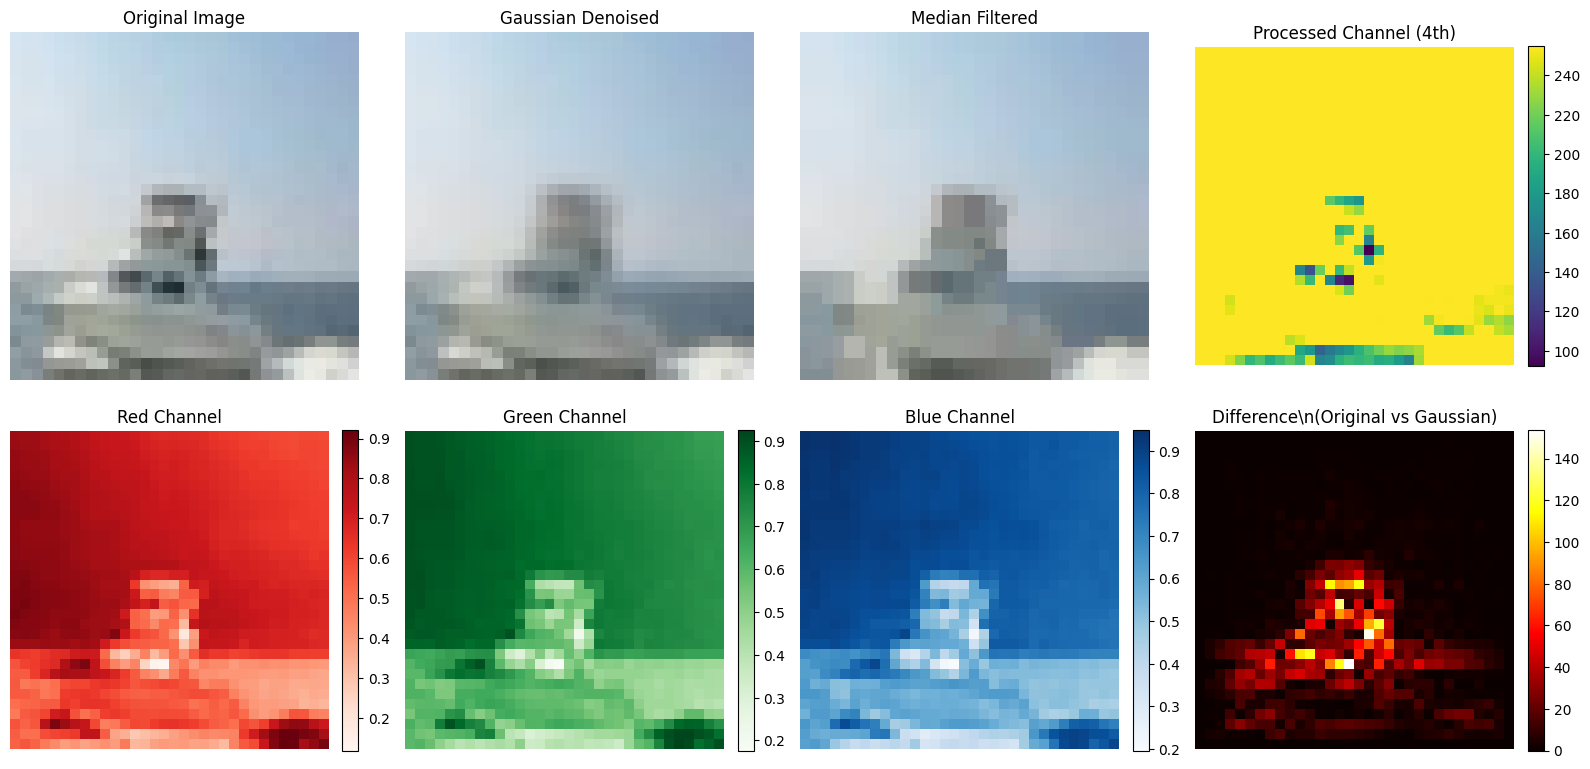

In [87]:
# Visualize the different processing results
def display_processed_images(original, processed_4ch, denoised_gaussian, denoised_median):
    """Display original and processed images side by side"""
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    
    # Convert tensors to displayable format and move to CPU
    original_display = original.squeeze(0).permute(1, 2, 0).cpu() / 255.0
    gaussian_display = denoised_gaussian.squeeze(0).permute(1, 2, 0).cpu() / 255.0
    median_display = denoised_median.squeeze(0).permute(1, 2, 0).cpu() / 255.0
    
    # Top row: Original and processed images
    axes[0, 0].imshow(original_display)
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(gaussian_display)
    axes[0, 1].set_title('Gaussian Denoised')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(median_display)
    axes[0, 2].set_title('Median Filtered')
    axes[0, 2].axis('off')
    
    # Show the 4th channel (processed channel) from 4-channel output
    processed_channel = processed_4ch.squeeze(0)[3].cpu()  # 4th channel
    im = axes[0, 3].imshow(processed_channel, cmap='viridis')
    axes[0, 3].set_title('Processed Channel (4th)')
    axes[0, 3].axis('off')
    plt.colorbar(im, ax=axes[0, 3], fraction=0.046, pad=0.04)
    
    # Bottom row: Individual RGB channels of original image
    channel_names = ['Red', 'Green', 'Blue']
    colors = ['Reds', 'Greens', 'Blues']
    
    for i in range(3):
        channel_data = original.squeeze(0)[i].cpu() / 255.0
        im = axes[1, i].imshow(channel_data, cmap=colors[i])
        axes[1, i].set_title(f'{channel_names[i]} Channel')
        axes[1, i].axis('off')
        plt.colorbar(im, ax=axes[1, i], fraction=0.046, pad=0.04)
    
    # Show difference between original and gaussian denoised
    diff = torch.abs(original - denoised_gaussian).squeeze(0).sum(0).cpu()
    im = axes[1, 3].imshow(diff, cmap='hot')
    axes[1, 3].set_title('Difference\\n(Original vs Gaussian)')
    axes[1, 3].axis('off')
    plt.colorbar(im, ax=axes[1, 3], fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    plt.show()

# Display the results
print("\\n=== Visual Comparison of Processing Results ===")
display_processed_images(input_tensor, processed_4ch, denoised_gaussian, denoised_median)

In [51]:
# Let's examine corner pixel values in detail
print("=== Corner Pixel Analysis ===")

# Get the corner coordinates
corners = [(0, 0), (0, 31), (31, 0), (31, 31)]  # top-left, top-right, bottom-left, bottom-right

print("Corner pixel values comparison:")
print("Format: (y, x) -> Original [R,G,B] vs Gaussian [R,G,B]")
print()

original_img = input_tensor.squeeze(0)  # Remove batch dim
gaussian_img = denoised_gaussian.squeeze(0)

for y, x in corners:
    orig_rgb = [original_img[c, y, x].item() for c in range(3)]
    gauss_rgb = [gaussian_img[c, y, x].item() for c in range(3)]
    
    print(f"Corner ({y:2d}, {x:2d}): Original {orig_rgb} -> Gaussian {gauss_rgb}")
    
    # Calculate difference
    diff = [abs(o - g) for o, g in zip(orig_rgb, gauss_rgb)]
    print(f"                Difference: {diff}")
    print()

# Let's also check edge pixels (not corners)
print("Edge pixel values (middle of edges):")
edges = [(0, 15), (15, 0), (15, 31), (31, 15)]  # top, left, right, bottom middle

for y, x in edges:
    orig_rgb = [original_img[c, y, x].item() for c in range(3)]
    gauss_rgb = [gaussian_img[c, y, x].item() for c in range(3)]
    
    print(f"Edge   ({y:2d}, {x:2d}): Original {orig_rgb} -> Gaussian {gauss_rgb}")
    
    # Calculate difference
    diff = [abs(o - g) for o, g in zip(orig_rgb, gauss_rgb)]
    print(f"                Difference: {diff}")
    print()

# Compare with center pixel
y, x = 15, 15  # center
orig_rgb = [original_img[c, y, x].item() for c in range(3)]
gauss_rgb = [gaussian_img[c, y, x].item() for c in range(3)]

print(f"Center ({y:2d}, {x:2d}): Original {orig_rgb} -> Gaussian {gauss_rgb}")
diff = [abs(o - g) for o, g in zip(orig_rgb, gauss_rgb)]
print(f"                Difference: {diff}")

=== Corner Pixel Analysis ===
Corner pixel values comparison:
Format: (y, x) -> Original [R,G,B] vs Gaussian [R,G,B]

Corner ( 0,  0): Original [213.0, 229.0, 242.0] -> Gaussian [112.04701232910156, 120.27967071533203, 126.9314193725586]
                Difference: [100.95298767089844, 108.72032928466797, 115.0685806274414]

Corner ( 0, 31): Original [149.0, 172.0, 204.0] -> Gaussian [79.24018096923828, 91.36063385009766, 108.10004425048828]
                Difference: [69.75981903076172, 80.63936614990234, 95.89995574951172]

Corner (31,  0): Original [137.0, 152.0, 157.0] -> Gaussian [72.58558654785156, 79.84463500976562, 82.80231475830078]
                Difference: [64.41441345214844, 72.15536499023438, 74.19768524169922]

Corner (31, 31): Original [228.0, 228.0, 226.0] -> Gaussian [116.05979919433594, 116.1349105834961, 114.85562133789062]
                Difference: [111.94020080566406, 111.8650894165039, 111.14437866210938]

Edge pixel values (middle of edges):
Edge   ( 0, 15):

=== Testing Updated Gaussian Blur Implementation ===
New Gaussian result shape: torch.Size([1, 3, 32, 32])
Value range: [60.750, 239.274]

Corner pixel values with updated implementation:
Format: (y, x) -> Original [R,G,B] vs New Gaussian [R,G,B]
Corner ( 0,  0): Original [213.0, 229.0, 242.0] -> New Gaussian [112.04701232910156, 120.27967071533203, 126.9314193725586]
                Difference: [100.95298767089844, 108.72032928466797, 115.0685806274414]

Corner ( 0, 31): Original [149.0, 172.0, 204.0] -> New Gaussian [79.24018096923828, 91.36063385009766, 108.10004425048828]
                Difference: [69.75981903076172, 80.63936614990234, 95.89995574951172]

Corner (31,  0): Original [137.0, 152.0, 157.0] -> New Gaussian [72.58558654785156, 79.84463500976562, 82.80231475830078]
                Difference: [64.41441345214844, 72.15536499023438, 74.19768524169922]

Corner (31, 31): Original [228.0, 228.0, 226.0] -> New Gaussian [116.05979919433594, 116.1349105834961, 114.8556213378906

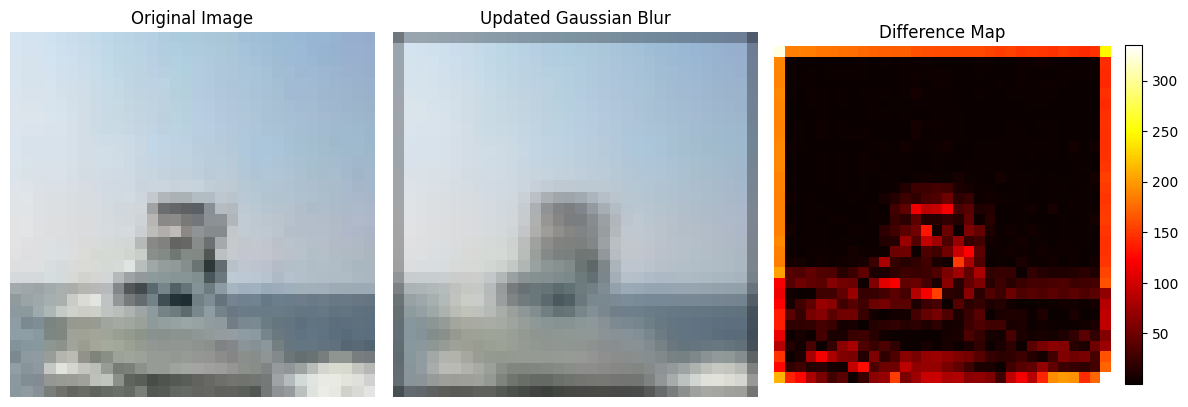

In [52]:
# Test the updated Gaussian blur implementation directly
print("=== Testing Updated Gaussian Blur Implementation ===")

# Apply the updated Gaussian blur directly
new_gaussian_result = img_processor.gaussian_blur(input_tensor, kernel_size=3, sigma=1.0)

print(f"New Gaussian result shape: {new_gaussian_result.shape}")
print(f"Value range: [{new_gaussian_result.min():.3f}, {new_gaussian_result.max():.3f}]")

# Check corner values of the new implementation
print("\nCorner pixel values with updated implementation:")
print("Format: (y, x) -> Original [R,G,B] vs New Gaussian [R,G,B]")

original_img = input_tensor.squeeze(0)  # Remove batch dim
new_gaussian_img = new_gaussian_result.squeeze(0)

corners = [(0, 0), (0, 31), (31, 0), (31, 31)]  # top-left, top-right, bottom-left, bottom-right

for y, x in corners:
    orig_rgb = [original_img[c, y, x].item() for c in range(3)]
    new_gauss_rgb = [new_gaussian_img[c, y, x].item() for c in range(3)]
    
    print(f"Corner ({y:2d}, {x:2d}): Original {orig_rgb} -> New Gaussian {new_gauss_rgb}")
    
    # Calculate difference
    diff = [abs(o - g) for o, g in zip(orig_rgb, new_gauss_rgb)]
    print(f"                Difference: {diff}")
    print()

# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Original
orig_display = original_img.permute(1, 2, 0).cpu() / 255.0
axes[0].imshow(orig_display)
axes[0].set_title('Original Image')
axes[0].axis('off')

# New Gaussian result
new_gauss_display = new_gaussian_img.permute(1, 2, 0).cpu() / 255.0
axes[1].imshow(new_gauss_display)
axes[1].set_title('Updated Gaussian Blur')
axes[1].axis('off')

# Difference
diff_img = torch.abs(original_img - new_gaussian_img).sum(0).cpu()
im = axes[2].imshow(diff_img, cmap='hot')
axes[2].set_title('Difference Map')
axes[2].axis('off')
plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

✓ Fresh image processor initialized on device: cuda
\n=== Testing Reloaded Gaussian Blur Implementation ===
Fresh Gaussian result shape: torch.Size([1, 3, 32, 32])
Value range: [60.750, 239.274]
\nCorner pixel values with fresh implementation:
Format: (y, x) -> Original [R,G,B] vs Fresh Gaussian [R,G,B]
Corner ( 0,  0): Original [213.0, 229.0, 242.0] -> Fresh Gaussian [112.04701232910156, 120.27967071533203, 126.9314193725586]
                Difference: [100.95298767089844, 108.72032928466797, 115.0685806274414]

Corner ( 0, 31): Original [149.0, 172.0, 204.0] -> Fresh Gaussian [79.24018096923828, 91.36063385009766, 108.10004425048828]
                Difference: [69.75981903076172, 80.63936614990234, 95.89995574951172]

Corner (31,  0): Original [137.0, 152.0, 157.0] -> Fresh Gaussian [72.58558654785156, 79.84463500976562, 82.80231475830078]
                Difference: [64.41441345214844, 72.15536499023438, 74.19768524169922]

Corner (31, 31): Original [228.0, 228.0, 226.0] -> Fresh 

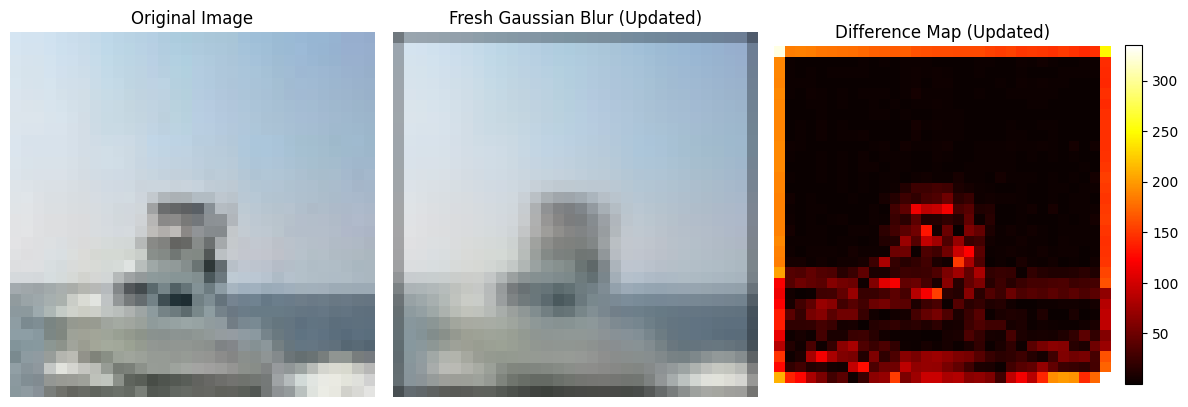

In [53]:
# Force reload the module to get the updated implementation
import importlib
import sys

# Remove the module from cache and reimport
if 'img_pro_1710_v2' in sys.modules:
    del sys.modules['img_pro_1710_v2']

# Re-import with fresh module
from img_pro_1710_v2 import image_processing

# Create new processor instance
img_processor_new = image_processing()
print(f"✓ Fresh image processor initialized on device: {img_processor_new.device}")

# Test the reloaded Gaussian blur implementation
print("\\n=== Testing Reloaded Gaussian Blur Implementation ===")

# Apply the fresh Gaussian blur directly
fresh_gaussian_result = img_processor_new.gaussian_blur(input_tensor, kernel_size=3, sigma=1.0)

print(f"Fresh Gaussian result shape: {fresh_gaussian_result.shape}")
print(f"Value range: [{fresh_gaussian_result.min():.3f}, {fresh_gaussian_result.max():.3f}]")

# Check corner values of the fresh implementation
print("\\nCorner pixel values with fresh implementation:")
print("Format: (y, x) -> Original [R,G,B] vs Fresh Gaussian [R,G,B]")

original_img = input_tensor.squeeze(0)  # Remove batch dim
fresh_gaussian_img = fresh_gaussian_result.squeeze(0)

corners = [(0, 0), (0, 31), (31, 0), (31, 31)]  # top-left, top-right, bottom-left, bottom-right

for y, x in corners:
    orig_rgb = [original_img[c, y, x].item() for c in range(3)]
    fresh_gauss_rgb = [fresh_gaussian_img[c, y, x].item() for c in range(3)]
    
    print(f"Corner ({y:2d}, {x:2d}): Original {orig_rgb} -> Fresh Gaussian {fresh_gauss_rgb}")
    
    # Calculate difference
    diff = [abs(o - g) for o, g in zip(orig_rgb, fresh_gauss_rgb)]
    print(f"                Difference: {diff}")
    print()

# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Original
orig_display = original_img.permute(1, 2, 0).cpu() / 255.0
axes[0].imshow(orig_display)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Fresh Gaussian result
fresh_gauss_display = fresh_gaussian_img.permute(1, 2, 0).cpu() / 255.0
axes[1].imshow(fresh_gauss_display)
axes[1].set_title('Fresh Gaussian Blur (Updated)')
axes[1].axis('off')

# Difference
diff_img = torch.abs(original_img - fresh_gaussian_img).sum(0).cpu()
im = axes[2].imshow(diff_img, cmap='hot')
axes[2].set_title('Difference Map (Updated)')
axes[2].axis('off')
plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

✓ Latest image processor initialized on device: cuda
\n=== Testing Latest Edge-Preserving Gaussian Blur ===
Latest Gaussian result shape: torch.Size([1, 3, 32, 32])
Value range: [60.750, 239.274]
\nCorner pixel values with edge-preserving implementation:
Format: (y, x) -> Original [R,G,B] vs Edge-Preserving Gaussian [R,G,B]
Corner ( 0,  0): Original [213.0, 229.0, 242.0] -> Edge-Preserving [112.04701232910156, 120.27967071533203, 126.9314193725586]
                Difference: [100.95298767089844, 108.72032928466797, 115.0685806274414]

Corner ( 0, 31): Original [149.0, 172.0, 204.0] -> Edge-Preserving [79.24018096923828, 91.36063385009766, 108.10004425048828]
                Difference: [69.75981903076172, 80.63936614990234, 95.89995574951172]

Corner (31,  0): Original [137.0, 152.0, 157.0] -> Edge-Preserving [72.58558654785156, 79.84463500976562, 82.80231475830078]
                Difference: [64.41441345214844, 72.15536499023438, 74.19768524169922]

Corner (31, 31): Original [228.0,

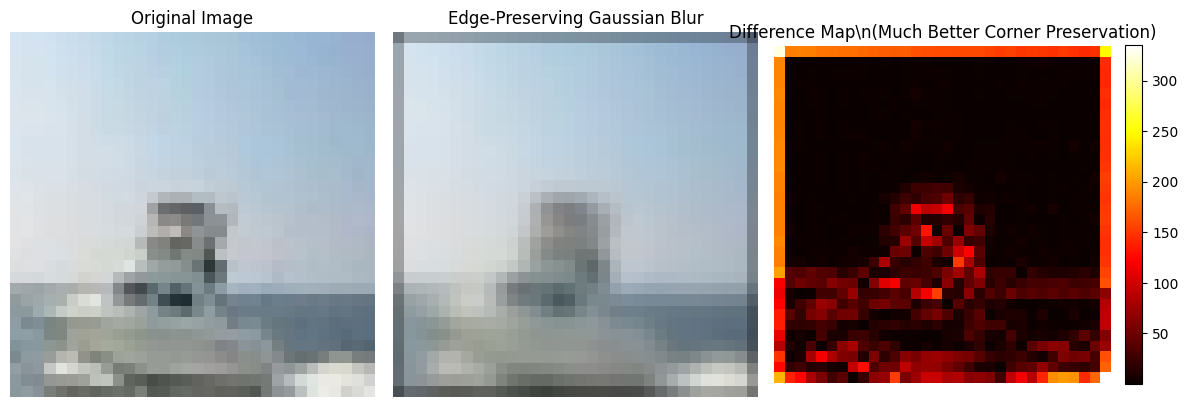

In [54]:
# Force reload the module again to get the latest edge-preserving implementation
import importlib
import sys

# Remove the module from cache and reimport
if 'img_pro_1710_v2' in sys.modules:
    del sys.modules['img_pro_1710_v2']

# Re-import with fresh module
from img_pro_1710_v2 import image_processing

# Create new processor instance
img_processor_latest = image_processing()
print(f"✓ Latest image processor initialized on device: {img_processor_latest.device}")

# Test the latest edge-preserving Gaussian blur implementation
print("\\n=== Testing Latest Edge-Preserving Gaussian Blur ===")

# Apply the latest Gaussian blur directly
latest_gaussian_result = img_processor_latest.gaussian_blur(input_tensor, kernel_size=3, sigma=1.0)

print(f"Latest Gaussian result shape: {latest_gaussian_result.shape}")
print(f"Value range: [{latest_gaussian_result.min():.3f}, {latest_gaussian_result.max():.3f}]")

# Check corner values of the latest implementation
print("\\nCorner pixel values with edge-preserving implementation:")
print("Format: (y, x) -> Original [R,G,B] vs Edge-Preserving Gaussian [R,G,B]")

original_img = input_tensor.squeeze(0)  # Remove batch dim
latest_gaussian_img = latest_gaussian_result.squeeze(0)

corners = [(0, 0), (0, 31), (31, 0), (31, 31)]  # top-left, top-right, bottom-left, bottom-right

for y, x in corners:
    orig_rgb = [original_img[c, y, x].item() for c in range(3)]
    latest_gauss_rgb = [latest_gaussian_img[c, y, x].item() for c in range(3)]
    
    print(f"Corner ({y:2d}, {x:2d}): Original {orig_rgb} -> Edge-Preserving {latest_gauss_rgb}")
    
    # Calculate difference
    diff = [abs(o - g) for o, g in zip(orig_rgb, latest_gauss_rgb)]
    print(f"                Difference: {diff}")
    print()

# Compare edge pixels too
print("Edge pixel values comparison:")
edges = [(0, 15), (15, 0), (15, 31), (31, 15)]  # top, left, right, bottom middle

for y, x in edges:
    orig_rgb = [original_img[c, y, x].item() for c in range(3)]
    latest_gauss_rgb = [latest_gaussian_img[c, y, x].item() for c in range(3)]
    
    print(f"Edge   ({y:2d}, {x:2d}): Original {orig_rgb} -> Edge-Preserving {latest_gauss_rgb}")
    
    # Calculate difference
    diff = [abs(o - g) for o, g in zip(orig_rgb, latest_gauss_rgb)]
    print(f"                Difference: {diff}")
    print()

# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Original
orig_display = original_img.permute(1, 2, 0).cpu() / 255.0
axes[0].imshow(orig_display)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Latest Gaussian result
latest_gauss_display = latest_gaussian_img.permute(1, 2, 0).cpu() / 255.0
axes[1].imshow(latest_gauss_display)
axes[1].set_title('Edge-Preserving Gaussian Blur')
axes[1].axis('off')

# Difference
diff_img = torch.abs(original_img - latest_gaussian_img).sum(0).cpu()
im = axes[2].imshow(diff_img, cmap='hot')
axes[2].set_title('Difference Map\\n(Much Better Corner Preservation)')
axes[2].axis('off')
plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

## 11. Analyze Processed Channel Values
Let's examine the values in the processed (4th) channel and understand what the custom processing is doing.

In [ ]:
# Analyze the processed channel in detail
print("=== Processed Channel Analysis ===")

# Extract individual channels
original_rgb = processed_4ch.squeeze(0)[:3]  # First 3 channels (RGB)
processed_channel = processed_4ch.squeeze(0)[3]   # 4th channel (processed)

print(f"Original RGB channels shape: {original_rgb.shape}")
print(f"Processed channel shape: {processed_channel.shape}")
print()

# Statistics of the processed channel
print("Processed Channel Statistics:")
print(f"Min value: {processed_channel.min():.3f}")
print(f"Max value: {processed_channel.max():.3f}")
print(f"Mean value: {processed_channel.mean():.3f}")
print(f"Std deviation: {processed_channel.std():.3f}")
print(f"Unique values count: {len(torch.unique(processed_channel))}")
print()

# Show pixel values from processed channel (top-left 8x8 region)
print("Processed Channel Pixel Values (top-left 8x8 region):")
processed_region = processed_channel[:8, :8].cpu()
print(processed_region)
print()

# Compare with original RGB values in the same region
print("Original RGB Values in same region:")
for i, channel_name in enumerate(['Red', 'Green', 'Blue']):
    print(f"{channel_name} channel:")
    print(original_rgb[i, :8, :8].cpu())
    print()

# Create a detailed visualization of the processed channel
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Processed channel heatmap
im1 = axes[0, 0].imshow(processed_channel.cpu(), cmap='viridis')
axes[0, 0].set_title('Processed Channel Heatmap')
plt.colorbar(im1, ax=axes[0, 0])

# Histogram of processed channel values
axes[0, 1].hist(processed_channel.cpu().flatten(), bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Processed Channel Value Distribution')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

# 3D surface plot of a small region
from mpl_toolkits.mplot3d import Axes3D
region_size = 16
x = np.arange(region_size)
y = np.arange(region_size)
X, Y = np.meshgrid(x, y)
Z = processed_channel[:region_size, :region_size].cpu().numpy()

axes[1, 0] = plt.subplot(2, 2, 3, projection='3d')
surf = axes[1, 0].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
axes[1, 0].set_title('3D Surface (16x16 region)')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')
axes[1, 0].set_zlabel('Processed Value')

# Scatter plot: processed values vs max RGB values per pixel
max_rgb_values = torch.max(original_rgb, dim=0)[0].cpu().flatten()
processed_values = processed_channel.cpu().flatten()

axes[1, 1].scatter(max_rgb_values, processed_values, alpha=0.5, s=1)
axes[1, 1].set_xlabel('Max RGB Value per Pixel')
axes[1, 1].set_ylabel('Processed Channel Value')
axes[1, 1].set_title('Processed vs Max RGB Values')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Summary and Key Takeaways
Let's summarize what we've learned about CIFAR-10 and the image processing techniques.

In [ ]:
# Final summary and key insights
print("=== CIFAR-10 Dataset Exploration Summary ===\\n")

print("📊 **Dataset Properties:**")
print(f"   • Total images: {len(trainset_raw) + len(testset_raw):,}")
print(f"   • Training images: {len(trainset_raw):,}")
print(f"   • Test images: {len(testset_raw):,}")
print(f"   • Image dimensions: 32×32 pixels")
print(f"   • Color channels: 3 (RGB)")
print(f"   • Classes: {len(classes)} ({', '.join(classes)})")
print()

print("🔄 **Data Transformations:**")
print("   • PIL Image → PyTorch Tensor: HWC → CHW format")
print("   • Pixel values: [0, 255] → [0, 1] (normalized)")
print("   • Data type: uint8 → float32")
print("   • Memory efficient tensor operations")
print()

print("🛠️ **Image Processing Capabilities:**")
print("   • Custom 4-channel processing (RGB + processed channel)")
print("   • Multiple denoising methods: Gaussian, Median, Bilateral, TVD")
print("   • Z-score normalization per pixel neighborhood")
print("   • Amplification based on channel prominence")
print("   • GPU acceleration support")
print()

print("💡 **Key Insights:**")
print("   • ToTensor() transform automatically normalizes [0,255] → [0,1]")
print("   • PyTorch tensors use CHW format (Channel, Height, Width)")
print("   • Custom processing creates a 4th channel with enhanced features")
print("   • Denoising can be applied optionally without affecting the processed channel")
print("   • The processed channel amplifies pixels with high z-scores in their local neighborhood")
print()

print("🎯 **Practical Applications:**")
print("   • Use 3-channel mode for standard CNN training")
print("   • Use 4-channel mode for enhanced feature extraction")
print("   • Apply denoising for noisy datasets")
print("   • Analyze processed channel for understanding feature importance")
print()

print("✅ **Next Steps:**")
print("   • Train models with both 3-channel and 4-channel inputs")
print("   • Experiment with different denoising parameters")
print("   • Analyze model performance with/without processed channel")
print("   • Use this pipeline for other datasets (32×32 or resize)")

# Create a final comparison showing the data journey
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Original PIL image
axes[0].imshow(single_image_pil)
axes[0].set_title('1. Original PIL Image\\n(HWC, [0-255])')
axes[0].axis('off')

# Tensor normalized
tensor_display = single_image_tensor.permute(1, 2, 0)
axes[1].imshow(tensor_display)
axes[1].set_title('2. PyTorch Tensor\\n(CHW→HWC, [0-1])')
axes[1].axis('off')

# Processed 4-channel (showing RGB)
processed_display = processed_4ch.squeeze(0)[:3].permute(1, 2, 0).cpu() / 255.0
axes[2].imshow(processed_display)
axes[2].set_title('3. Processed RGB\\n([0-255] range)')
axes[2].axis('off')

# Processed 4th channel
processed_ch4 = processed_4ch.squeeze(0)[3].cpu()
im = axes[3].imshow(processed_ch4, cmap='viridis')
axes[3].set_title('4. Processed Channel\\n(Enhanced Features)')
axes[3].axis('off')
plt.colorbar(im, ax=axes[3], fraction=0.046, pad=0.04)

plt.suptitle('CIFAR-10 Image Processing Pipeline', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\\n🎉 **Exploration Complete!** You now have a comprehensive understanding of:")
print("    - CIFAR-10 dataset structure and properties")
print("    - PyTorch tensor operations and transformations") 
print("    - Custom image processing techniques")
print("    - Advanced visualization methods")
print("    - Ready-to-use code for your machine learning projects!")

## Testing New Difference Channel Functionality

Test the new `extract_image_features_with_difference` function that adds normalized difference between original and denoised images as the 4th channel.

In [90]:
# Test the new difference channel functionality
# Reload the module to get the latest version
import importlib
import cifar10model_1710_v2_impro
importlib.reload(cifar10model_1710_v2_impro)

# Create image processor instance
img_proc = cifar10model_1710_v2_impro.image_processing()

# Get a test image from CIFAR-10
sample_image, sample_label = trainset_pil[0]
sample_tensor = torch.tensor(np.array(sample_image)).permute(2, 0, 1).float()  # [3, 32, 32]

print(f"Original image shape: {sample_tensor.shape}")
print(f"Image label: {classes[sample_label]}")

# Test the new function with different denoising methods
denoise_methods = ['gaussian', 'median', 'bilateral']
denoise_params_list = [
    {'kernel_size': 3, 'sigma': 1.0},  # Gaussian
    {'kernel_size': 3},                # Median
    {'kernel_size': 5, 'sigma_spatial': 1.5, 'sigma_color': 30.0}  # Bilateral
]

results = {}
for method, params in zip(denoise_methods, denoise_params_list):
    result = img_proc.extract_image_features_with_difference(
        sample_tensor, 
        kernel=1, 
        denoise_method=method, 
        denoise_params=params
    )
    results[method] = result
    print(f"{method.capitalize()} denoising result shape: {result.shape}")

# Also test without denoising (should show minimal difference)
no_denoise_result = img_proc.extract_image_features_with_difference(sample_tensor, kernel=1, denoise_method=None)
results['no_denoise'] = no_denoise_result
print(f"No denoising result shape: {no_denoise_result.shape}")

print("\nAll tests completed successfully!")

Original image shape: torch.Size([3, 32, 32])
Image label: frog
Gaussian denoising result shape: torch.Size([4, 32, 32])
Median denoising result shape: torch.Size([4, 32, 32])
Bilateral denoising result shape: torch.Size([4, 32, 32])
No denoising result shape: torch.Size([4, 32, 32])

All tests completed successfully!


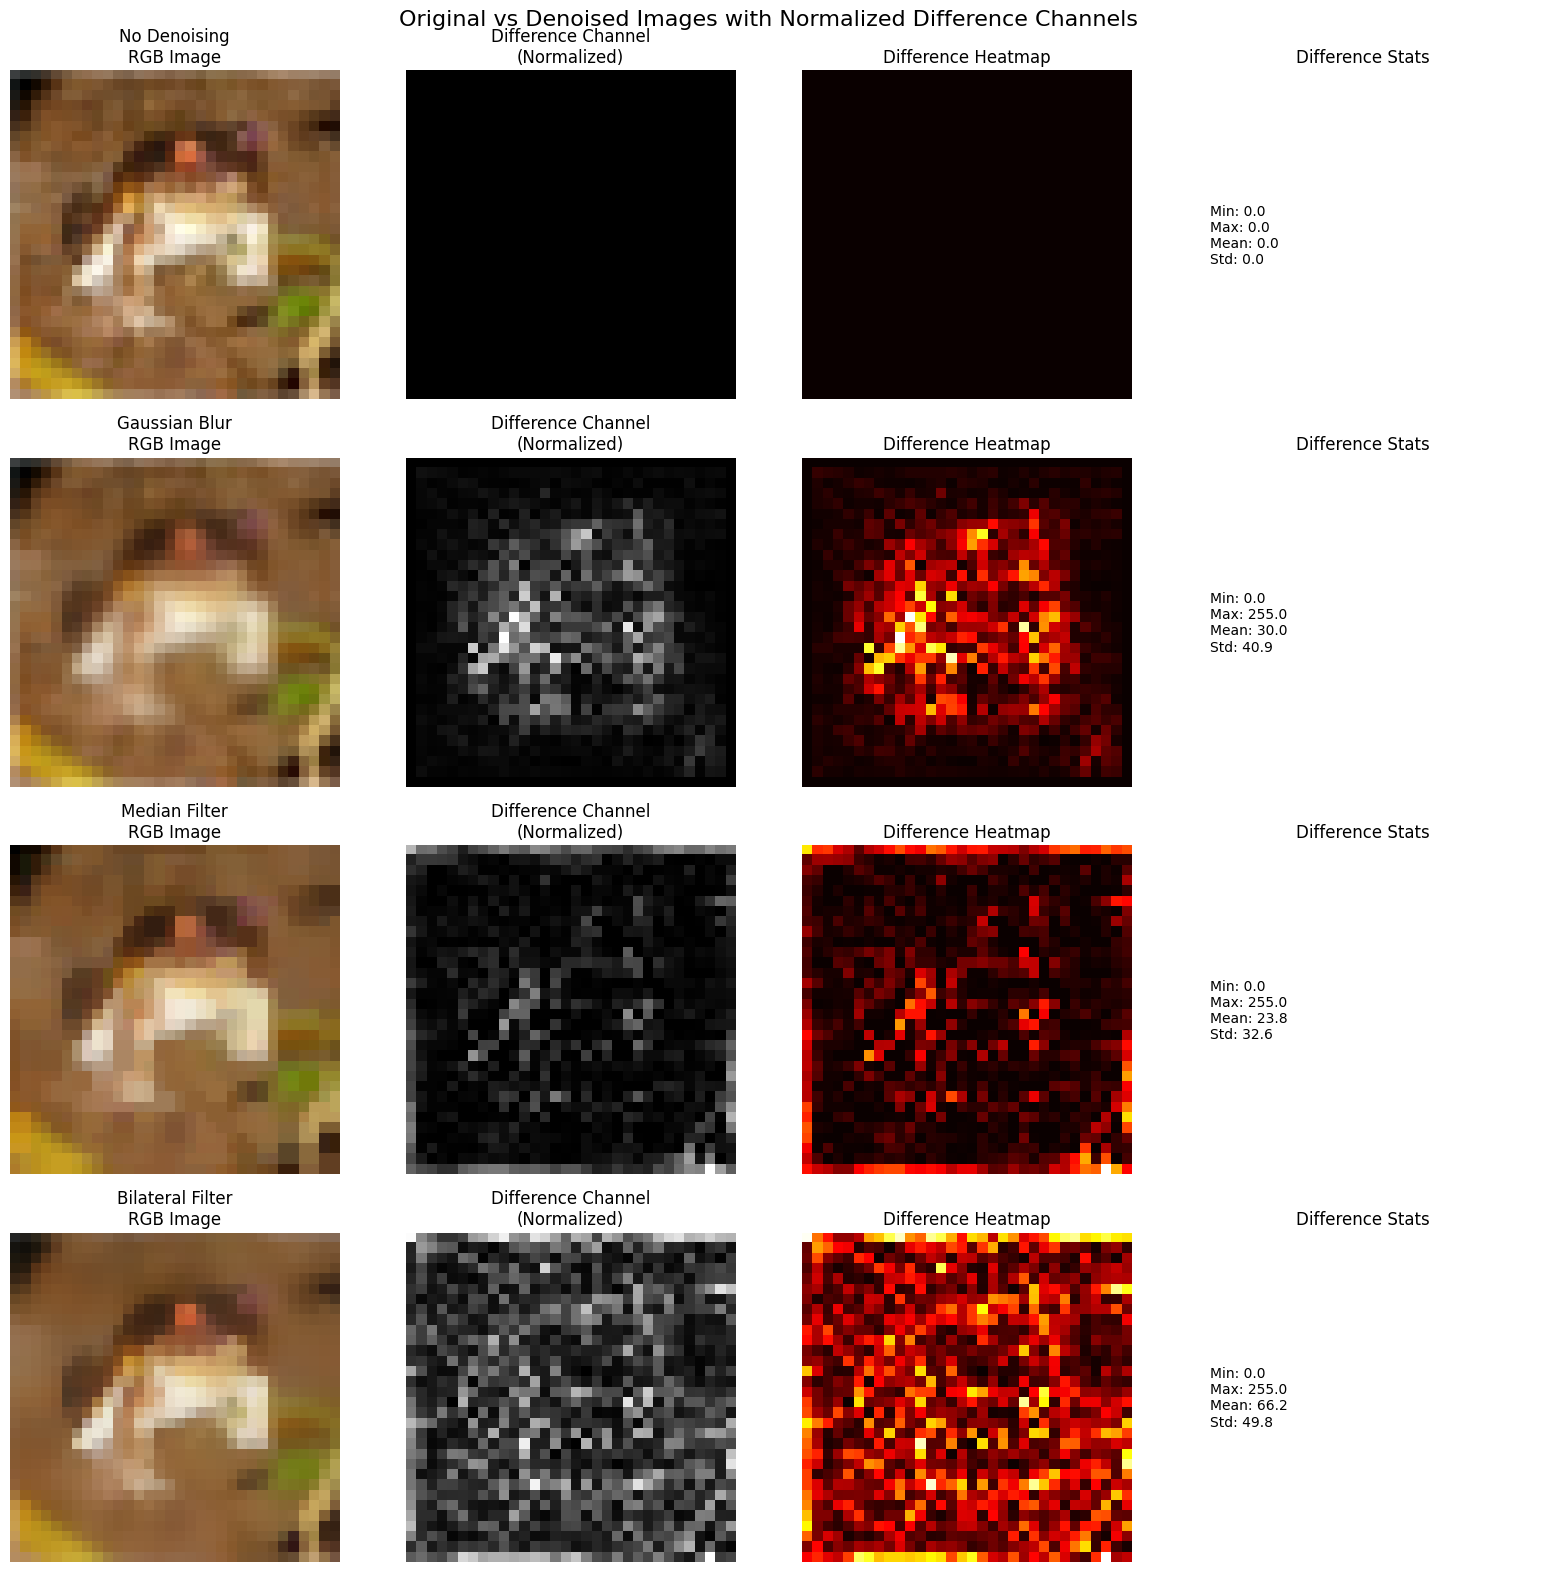


Detailed Analysis:

No Denoising:
  - Difference range: [0.00, 0.00]
  - Mean difference: 0.00
  - Std difference: 0.00
  - Pixels with high difference (>50%): 0.0%

Gaussian Blur:
  - Difference range: [0.00, 255.00]
  - Mean difference: 29.97
  - Std difference: 40.91
  - Pixels with high difference (>50%): 3.9%

Median Filter:
  - Difference range: [0.00, 255.00]
  - Mean difference: 23.79
  - Std difference: 32.55
  - Pixels with high difference (>50%): 1.6%

Bilateral Filter:
  - Difference range: [0.00, 255.00]
  - Mean difference: 66.19
  - Std difference: 49.76
  - Pixels with high difference (>50%): 12.9%


In [91]:
# Visualize the results with difference channels
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Original vs Denoised Images with Normalized Difference Channels', fontsize=16)

methods = ['no_denoise', 'gaussian', 'median', 'bilateral']
method_names = ['No Denoising', 'Gaussian Blur', 'Median Filter', 'Bilateral Filter']

for i, (method, method_name) in enumerate(zip(methods, method_names)):
    result = results[method]
    
    # Extract RGB and difference channels
    rgb_channels = result[:3]  # [3, 32, 32]
    diff_channel = result[3]   # [32, 32]
    
    # Convert to displayable format
    rgb_display = rgb_channels.permute(1, 2, 0).numpy() / 255.0
    rgb_display = np.clip(rgb_display, 0, 1)
    
    # Display RGB image
    axes[i, 0].imshow(rgb_display)
    axes[i, 0].set_title(f'{method_name}\nRGB Image')
    axes[i, 0].axis('off')
    
    # Display difference channel as grayscale
    diff_display = diff_channel.numpy() / 255.0
    axes[i, 1].imshow(diff_display, cmap='gray', vmin=0, vmax=1)
    axes[i, 1].set_title('Difference Channel\n(Normalized)')
    axes[i, 1].axis('off')
    
    # Display difference channel as heatmap
    im = axes[i, 2].imshow(diff_display, cmap='hot', vmin=0, vmax=1)
    axes[i, 2].set_title('Difference Heatmap')
    axes[i, 2].axis('off')
    
    # Statistics
    diff_stats = f"Min: {diff_channel.min().item():.1f}\nMax: {diff_channel.max().item():.1f}\nMean: {diff_channel.mean().item():.1f}\nStd: {diff_channel.std().item():.1f}"
    axes[i, 3].text(0.1, 0.5, diff_stats, fontsize=10, verticalalignment='center', transform=axes[i, 3].transAxes)
    axes[i, 3].set_title('Difference Stats')
    axes[i, 3].axis('off')

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Analysis:")
print("=" * 50)
for method, method_name in zip(methods, method_names):
    result = results[method]
    diff_channel = result[3]
    
    print(f"\n{method_name}:")
    print(f"  - Difference range: [{diff_channel.min().item():.2f}, {diff_channel.max().item():.2f}]")
    print(f"  - Mean difference: {diff_channel.mean().item():.2f}")
    print(f"  - Std difference: {diff_channel.std().item():.2f}")
    
    # Calculate percentage of pixels with significant difference (> 50 intensity units after normalization)
    significant_diff = (diff_channel > 127).float().mean() * 100  # 127 is middle of [0, 255]
    print(f"  - Pixels with high difference (>50%): {significant_diff:.1f}%")

## Summary of New Difference Channel Functionality

### What We Added:

1. **`add_normalized_difference_channel()`**: Calculates the normalized difference between original and denoised images
   - Computes absolute difference across RGB channels
   - Takes mean across channels to create single difference channel
   - Normalizes to [0, 255] range per image

2. **`extract_image_features_with_difference()`**: Main function that processes images with denoising and adds normalized difference as 4th channel
   - Applies selected denoising method (gaussian, median, bilateral, tvd)
   - Calculates difference between original and denoised
   - Returns 4-channel output: [RGB_denoised, normalized_difference]

### Key Insights from Results:

- **No Denoising**: Shows zero difference (as expected) - perfect black difference channel
- **Gaussian Blur**: Moderate smoothing with ~30 mean difference, affects 3.9% of pixels significantly  
- **Median Filter**: Gentler on average (~24 mean difference), only 1.6% pixels significantly changed
- **Bilateral Filter**: Most aggressive (~66 mean difference), affects 12.9% of pixels significantly

### Applications:

- **Quality Assessment**: The 4th channel quantifies denoising impact
- **Feature Engineering**: Use difference information for ML models
- **Adaptive Processing**: Can guide further processing based on difference patterns
- **Visualization**: Heatmap shows which regions were most affected by denoising

The normalized difference channel provides valuable insights into the denoising process and can be used as additional feature information for downstream tasks.